In [1]:
%matplotlib notebook
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import sys
new_paths = ['../../src/Models/', '../../src/Misc/', '../../src/','/Users/frisk/Diagnos/Work/PyFaultDiagnosisToolbox/src/faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/']
[sys.path.append(d) for d in new_paths if not d in sys.path]
from controlpy.synthesis import controller_lqr
from misc import *
import faultdiagnosistoolbox as fdt
from TankSimulation import *

In [2]:
from ThreeTank_model_sym import model
params = {}
params['Rv1'] = 1
params['Rv2'] = 1
params['Rv3'] = 1
params['CT1'] = 1
params['CT2'] = 1
params['CT3'] = 1

In [ ]:
plt.figure(10)
model.PlotModel()
plt.show()

Design controller

In [3]:
G = ThreeTank_ss(params)
Lx,_,_ = controller_lqr(G['A'], G['B'], np.eye(3,3),np.eye(1)*0.5)
Lr = (1/np.dot([1,0,0],-inv(G['A']-G['B'].dot(Lx)).dot(G['B'])))[0]
def ref(t):
    return 0.2*np.sin(2*np.pi*1/10*t)+1;
controller = lambda t,x: np.transpose((-Lx.dot(np.transpose(x))+Lr*ref(t)).clip(0))

Simulate scenarios {NF, Rv1, Rv2, Rv3, CT1, CT2, CT3}

In [40]:
noise = 0
t = np.arange(0,20,0.1)
x0 = [0,0,0]
sim = []
sim.append(SimScenario(0,lambda t: 0*t, controller, params, t, x0))
sim.append(SimScenario(1,lambda t: 0.3*ramp(t,6,10), controller, params, t, x0))
sim.append(SimScenario(2,lambda t: 0.3*ramp(t,6,10), controller, params, t, x0))
sim.append(SimScenario(3,lambda t: 0.3*ramp(t,6,10), controller, params, t, x0))
sim.append(SimScenario(4,lambda t: 0.3*ramp(t,6,10), controller, params, t, x0))
sim.append(SimScenario(5,lambda t: 0.3*ramp(t,6,10), controller, params, t, x0))
sim.append(SimScenario(6,lambda t: 0.3*ramp(t,6,10), controller, params, t, x0))

# Define measurements and add noise
nstd = np.array([0.01,0,0,0,0,0.01,0])*noise;
meas = [0,5,3]; # p1, q2, q0

M = np.zeros((sim[0].z0.shape[1], len(meas)))
M[meas,np.arange(0,len(meas))]=1

for k in range(len(sim)):
    sim[k].z = (sim[k].z0).dot(M) + np.random.normal(0,1,(sim[k].z0.shape[0],len(meas))).dot(np.diag(nstd[meas]))

Plot fault free and Rv1 scenarios

<IPython.core.display.Javascript object>


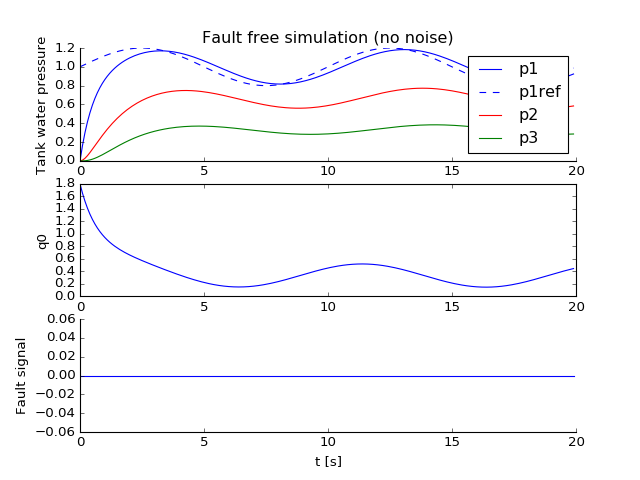

<IPython.core.display.Javascript object>


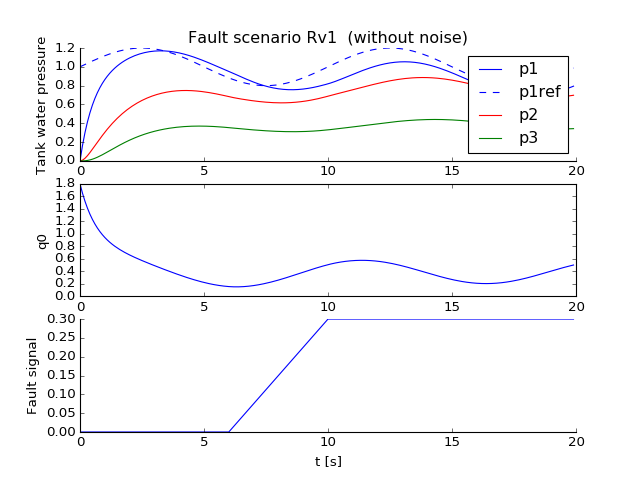

In [8]:
plt.figure(40)
plt.subplot(3,1,1)
plt.plot( sim[0].t, sim[0].z0[:,0], 'b', sim[0].t, ref(sim[0].t), 'b--', 
         sim[0].t, sim[0].z0[:,1], 'r', sim[0].t, sim[0].z0[:,2], 'g')
plt.ylabel('Tank water pressure')
plt.legend(['p1','p1ref','p2','p3'])
plt.title('Fault free simulation (no noise)')

BoxOff()
plt.subplot(3,1,2)
plt.plot( sim[0].t, sim[0].z0[:,3])
plt.ylabel('q0')

plt.subplot(3,1,3)
plt.plot( sim[0].t, sim[0].f)
plt.ylabel('Fault signal')
plt.xlabel('t [s]')
BoxOff()

plt.show()

plt.figure(41)
plt.subplot(3,1,1)
plt.plot( sim[1].t, sim[1].z0[:,0], 'b', sim[1].t, ref(sim[1].t), 'b--', 
         sim[1].t, sim[1].z0[:,1], 'r', sim[1].t, sim[1].z0[:,2], 'g')
plt.ylabel('Tank water pressure')
plt.legend(['p1','p1ref','p2','p3'])
plt.title('Fault scenario Rv1  (without noise)')

BoxOff()
plt.subplot(3,1,2)
plt.plot( sim[1].t, sim[1].z0[:,3])
plt.ylabel('q0')

plt.subplot(3,1,3)
plt.plot( sim[1].t, sim[1].f)
plt.ylabel('Fault signal')
plt.xlabel('t [s]')
BoxOff()

plt.show()